In [68]:
import pandas as pd
import numpy as np
pd.options.display.max_rows = 400
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
''' 
For this stage I brought in projection data for RBs, WRs and TEs, and decided
to take an iterative approach by exploring each position seperately. The bottom section 
includes a merged dataset of RBs that includes projections, actual points,
adp rank and positional rank at end of year. Finally, I added the target
feature
'''

In [2]:
df = pd.read_csv('/Users/ekselan/Documents/GitHub/DS-Unit-2-Applied-Modeling/data/FF_Build/FP_FF_Projs_FLEX_2019.csv')
print(df.shape)
df.head()

(491, 11)


,Player,Team,POS,ATT,YDS,TDS,REC,YDS.1,TDS.1,FL,FPTS
0,,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Saquon Barkley,NYG,RB1,269.0,"1,253.7",9.6,87.6,705.5,3.4,1.5,358.6
2,Christian McCaffrey,CAR,RB2,215.8,"1,044.8",6.7,97.2,824.3,5.1,1.8,351.6
3,Alvin Kamara,NO,RB3,194.7,913.8,9.6,87.4,771.3,4.6,1.5,338.3
4,Ezekiel Elliott,DAL,RB4,294.3,"1,295.2",8.9,67.0,515.7,2.6,2.2,312.5


In [9]:
df.head(15)

,Player,Team,POS,ATT,YDS,TDS,REC,YDS.1,TDS.1,FL,FPTS
0,,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Saquon Barkley,NYG,RB1,269.0,"1,253.7",9.6,87.6,705.5,3.4,1.5,358.6
2,Christian McCaffrey,CAR,RB2,215.8,"1,044.8",6.7,97.2,824.3,5.1,1.8,351.6
3,Alvin Kamara,NO,RB3,194.7,913.8,9.6,87.4,771.3,4.6,1.5,338.3
4,Ezekiel Elliott,DAL,RB4,294.3,"1,295.2",8.9,67.0,515.7,2.6,2.2,312.5
5,Julio Jones,ATL,WR1,1.5,9.4,0.0,105.8,"1,525.8",8.9,0.3,312.0
6,DeAndre Hopkins,ARI,WR2,0.2,1.2,0.0,102.5,"1,438.5",10.3,0.3,307.4
7,Davante Adams,GB,WR3,0.0,0.0,0.0,105.7,"1,355.2",10.4,0.2,303.6
8,Michael Thomas,NO,WR4,0.0,0.0,0.0,111.7,"1,347.9",8.5,0.4,297.0
9,JuJu Smith-Schuster,PIT,WR5,0.2,1.7,0.0,103.8,"1,360.9",8.9,0.3,293.2


In [18]:
# Drop nan values

df = df.dropna()
print(df.shape)
df.head()

(488, 11)


,Player,Team,POS,ATT,YDS,TDS,REC,YDS.1,TDS.1,FL,FPTS
1,Saquon Barkley,NYG,RB1,269.0,"1,253.7",9.6,87.6,705.5,3.4,1.5,358.6
2,Christian McCaffrey,CAR,RB2,215.8,"1,044.8",6.7,97.2,824.3,5.1,1.8,351.6
3,Alvin Kamara,NO,RB3,194.7,913.8,9.6,87.4,771.3,4.6,1.5,338.3
4,Ezekiel Elliott,DAL,RB4,294.3,"1,295.2",8.9,67.0,515.7,2.6,2.2,312.5
5,Julio Jones,ATL,WR1,1.5,9.4,0.0,105.8,"1,525.8",8.9,0.3,312.0


In [23]:
# Creat subset that just includes RB projections

rb_projs = df[df['POS'].str.contains('RB')]
print(rb_projs.shape)
rb_projs

(148, 11)


,Player,Team,POS,ATT,YDS,TDS,REC,YDS.1,TDS.1,FL,FPTS
1,Saquon Barkley,NYG,RB1,269.0,"1,253.7",9.6,87.6,705.5,3.4,1.5,358.6
2,Christian McCaffrey,CAR,RB2,215.8,"1,044.8",6.7,97.2,824.3,5.1,1.8,351.6
3,Alvin Kamara,NO,RB3,194.7,913.8,9.6,87.4,771.3,4.6,1.5,338.3
4,Ezekiel Elliott,DAL,RB4,294.3,"1,295.2",8.9,67.0,515.7,2.6,2.2,312.5
10,Le'Veon Bell,NYJ,RB5,257.1,"1,106.4",7.6,64.0,514.9,2.6,1.8,284.1
...,...,...,...,...,...,...,...,...,...,...,...
475,Chandler Cox,MIA,RB144,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
476,Marcus Murphy,CAR,RB145,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
480,Cullen Gillaspia,HOU,RB146,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
484,Khalfani Muhammad,DEN,RB147,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
# Import RB actual points

rb_points = pd.read_csv('/Users/ekselan/Documents/GitHub/DS-Unit-2-Applied-Modeling/data/FF_Build/FP_FF_Points_Scored_RB_2019.csv')
print(rb_points.shape)
rb_points.head()

(192, 6)


,Rank,Player,Team,Points,Games,Avg
0,1.0,Christian McCaffrey,CAR,471.2,16.0,29.5
1,2.0,Aaron Jones,GB,314.8,16.0,19.7
2,3.0,Ezekiel Elliott,DAL,311.7,16.0,19.5
3,4.0,Austin Ekeler,LAC,309.0,16.0,19.3
4,5.0,Derrick Henry,TEN,294.6,15.0,19.6


In [22]:
# Drop nan values for rb points

rb_points = rb_points.dropna()
print(rb_points.shape)
rb_points.head()

(190, 6)


,Rank,Player,Team,Points,Games,Avg
0,1.0,Christian McCaffrey,CAR,471.2,16.0,29.5
1,2.0,Aaron Jones,GB,314.8,16.0,19.7
2,3.0,Ezekiel Elliott,DAL,311.7,16.0,19.5
3,4.0,Austin Ekeler,LAC,309.0,16.0,19.3
4,5.0,Derrick Henry,TEN,294.6,15.0,19.6


In [31]:
# Make sure we're not looking at players that scored 0 points

rb_points = rb_points[rb_points['Points'] >= 0.1]
print(rb_points.shape)
rb_points

(152, 6)


,Rank,Player,Team,Points,Games,Avg
0,1.0,Christian McCaffrey,CAR,471.2,16.0,29.5
1,2.0,Aaron Jones,GB,314.8,16.0,19.7
2,3.0,Ezekiel Elliott,DAL,311.7,16.0,19.5
3,4.0,Austin Ekeler,LAC,309.0,16.0,19.3
4,5.0,Derrick Henry,TEN,294.6,15.0,19.6
...,...,...,...,...,...,...
147,148.0,Ryan Nall,CHI,0.8,8.0,0.1
148,149.0,Tony Brooks-James,MIN,0.7,3.0,0.2
149,150.0,De'Lance Turner,MIA,0.6,9.0,0.1
150,151.0,Alfred Morris,FA,0.4,1.0,0.4


In [33]:
rbs = rb_projs.merge(rb_points, on='Player', how='outer')
print(rbs.shape)
rbs

(177, 16)


,Player,Team_x,POS,ATT,YDS,TDS,REC,YDS.1,TDS.1,FL,FPTS,Rank,Team_y,Points,Games,Avg
0,Saquon Barkley,NYG,RB1,269.0,"1,253.7",9.6,87.6,705.5,3.4,1.5,358.6,10.0,NYG,244.1,13.0,18.8
1,Christian McCaffrey,CAR,RB2,215.8,"1,044.8",6.7,97.2,824.3,5.1,1.8,351.6,1.0,CAR,471.2,16.0,29.5
2,Alvin Kamara,NO,RB3,194.7,913.8,9.6,87.4,771.3,4.6,1.5,338.3,9.0,NO,248.5,14.0,17.8
3,Ezekiel Elliott,DAL,RB4,294.3,"1,295.2",8.9,67.0,515.7,2.6,2.2,312.5,3.0,DAL,311.7,16.0,19.5
4,Le'Veon Bell,NYJ,RB5,257.1,"1,106.4",7.6,64.0,514.9,2.6,1.8,284.1,16.0,NYJ,215.0,15.0,14.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,Zach Zenner,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,132.0,FA,3.7,6.0,0.6
173,Jay Ajayi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,134.0,FA,3.0,4.0,0.8
174,Ryan Nall,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,148.0,CHI,0.8,8.0,0.1
175,Tony Brooks-James,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,149.0,MIN,0.7,3.0,0.2


In [ ]:
# Cleaned up the "rbs" column a bit by removing nan values - there were 
# 8 observations (Devonta Freeman, Josh Jacobs, Carlos Hyde, DeAndre Washington,
#                 LeSean McCoy, Frank Gore, Chris Thompson, Jalen Richard)
# where the projections did not pull in, but I only need to keep Freeman and Jacobs
# (the other players had high ADPs already, and I am particularly interested in 
# players with low ADPs, i.e. earlier rounds)

In [47]:
rbs[rbs['Points'] >=50]

,Player,Team_x,POS,ATT,YDS,TDS,REC,YDS.1,TDS.1,FL,FPTS,Rank,Team_y,Points,Games,Avg
0,Saquon Barkley,NYG,RB1,269.0,"1,253.7",9.6,87.6,705.5,3.4,1.5,358.6,10.0,NYG,244.1,13.0,18.8
1,Christian McCaffrey,CAR,RB2,215.8,"1,044.8",6.7,97.2,824.3,5.1,1.8,351.6,1.0,CAR,471.2,16.0,29.5
2,Alvin Kamara,NO,RB3,194.7,913.8,9.6,87.4,771.3,4.6,1.5,338.3,9.0,NO,248.5,14.0,17.8
3,Ezekiel Elliott,DAL,RB4,294.3,"1,295.2",8.9,67.0,515.7,2.6,2.2,312.5,3.0,DAL,311.7,16.0,19.5
4,Le'Veon Bell,NYJ,RB5,257.1,"1,106.4",7.6,64.0,514.9,2.6,1.8,284.1,16.0,NYJ,215.0,15.0,14.3
5,David Johnson,HOU,RB6,247.0,"1,000.4",7.4,59.3,565.3,3.1,2.4,274.3,37.0,HOU,141.5,13.0,10.9
6,Dalvin Cook,MIN,RB7,245.8,"1,113.0",6.6,59.5,455.8,2.2,2.9,263.5,6.0,MIN,292.4,14.0,20.9
7,James Conner,PIT,RB8,228.1,"1,016.9",9.5,53.5,435.2,1.6,1.7,261.6,35.0,PIT,145.5,10.0,14.6
8,Todd Gurley,ATL,RB9,218.4,"1,009.4",9.9,46.3,423.9,2.6,1.5,261.4,14.0,ATL,219.4,15.0,14.6
9,Joe Mixon,CIN,RB10,245.7,"1,144.0",8.4,47.1,354.8,1.2,1.5,251.5,13.0,CIN,225.4,16.0,14.1


In [54]:
rbs.loc[rbs['Player'] == 'Josh Jacobs']

,Player,Team_x,POS,ATT,YDS,TDS,REC,YDS.1,TDS.1,FL,FPTS,Rank,Team_y,Points,Games,Avg
149,Josh Jacobs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0,LV,191.6,13.0,14.7


In [55]:
# I'll need to manually fill the values for Freeman and Jacobs,
# so I'll use a dictionary for each

i = {'Team_x':'LV',
     'POS':'RB',
     'ATT':214,
     'YDS':938.7,
     'TDS':6.5,
     'REC':42.3,
     'YDS.1':50,
     'TDS.1':0,
     'FL':1,
     'FPTS':174.8
}

ii = {'Team_x':'ATL',
     'POS':'RB',
     'ATT':202.9,
     'YDS':874,
     'TDS':6.9,
     'REC':41.5,
     'YDS.1':50,
     'TDS.1':0,
     'FL':1,
     'FPTS':170.2
}


In [56]:
# Try Josh first - fill values with disctionary

rbs.loc[rbs['Player'] == 'Josh Jacobs'] = rbs.loc[rbs['Player'] == 'Josh Jacobs'].fillna(i)

In [57]:
rbs.loc[rbs['Player'] == 'Josh Jacobs']

# Looks like that worked, so now for Devonta

,Player,Team_x,POS,ATT,YDS,TDS,REC,YDS.1,TDS.1,FL,FPTS,Rank,Team_y,Points,Games,Avg
149,Josh Jacobs,LV,RB,214.0,938.7,6.5,42.3,50,0.0,1.0,174.8,21.0,LV,191.6,13.0,14.7


In [58]:
rbs.loc[rbs['Player'] == 'Devonta Freeman'] = rbs.loc[rbs['Player'] == 'Devonta Freeman'].fillna(ii)
rbs.loc[rbs['Player'] == 'Devonta Freeman']

,Player,Team_x,POS,ATT,YDS,TDS,REC,YDS.1,TDS.1,FL,FPTS,Rank,Team_y,Points,Games,Avg
148,Devonta Freeman,ATL,RB,202.9,874,6.9,41.5,50,0.0,1.0,170.2,20.0,FA,197.6,14.0,14.1


In [64]:
# Now I can drop all remaining nan values with the confidence that I am
# retaining all of my fantasy relevant players

rbs_cleaned = rbs.dropna()
print(rbs_cleaned.shape)
rbs_cleaned

(125, 16)


,Player,Team_x,POS,ATT,YDS,TDS,REC,YDS.1,TDS.1,FL,FPTS,Rank,Team_y,Points,Games,Avg
0,Saquon Barkley,NYG,RB1,269.0,"1,253.7",9.6,87.6,705.5,3.4,1.5,358.6,10.0,NYG,244.1,13.0,18.8
1,Christian McCaffrey,CAR,RB2,215.8,"1,044.8",6.7,97.2,824.3,5.1,1.8,351.6,1.0,CAR,471.2,16.0,29.5
2,Alvin Kamara,NO,RB3,194.7,913.8,9.6,87.4,771.3,4.6,1.5,338.3,9.0,NO,248.5,14.0,17.8
3,Ezekiel Elliott,DAL,RB4,294.3,"1,295.2",8.9,67.0,515.7,2.6,2.2,312.5,3.0,DAL,311.7,16.0,19.5
4,Le'Veon Bell,NYJ,RB5,257.1,"1,106.4",7.6,64.0,514.9,2.6,1.8,284.1,16.0,NYJ,215.0,15.0,14.3
5,David Johnson,HOU,RB6,247.0,"1,000.4",7.4,59.3,565.3,3.1,2.4,274.3,37.0,HOU,141.5,13.0,10.9
6,Dalvin Cook,MIN,RB7,245.8,"1,113.0",6.6,59.5,455.8,2.2,2.9,263.5,6.0,MIN,292.4,14.0,20.9
7,James Conner,PIT,RB8,228.1,"1,016.9",9.5,53.5,435.2,1.6,1.7,261.6,35.0,PIT,145.5,10.0,14.6
8,Todd Gurley,ATL,RB9,218.4,"1,009.4",9.9,46.3,423.9,2.6,1.5,261.4,14.0,ATL,219.4,15.0,14.6
9,Joe Mixon,CIN,RB10,245.7,"1,144.0",8.4,47.1,354.8,1.2,1.5,251.5,13.0,CIN,225.4,16.0,14.1


In [65]:
rbs_cleaned.isnull().sum()

Player    0
Team_x    0
POS       0
ATT       0
YDS       0
TDS       0
REC       0
YDS.1     0
TDS.1     0
FL        0
FPTS      0
Rank      0
Team_y    0
Points    0
Games     0
Avg       0
dtype: int64

In [69]:
# Now I'll bring in the ADP data for RBS

rb_adp = pd.read_csv('/Users/ekselan/Documents/GitHub/DS-Unit-2-Applied-Modeling/data/FF_Build/FP_FF_ADP_RB_2019.csv')
print(rb_adp.shape)
rb_adp

(258, 12)


,RB,Overall,Player,Team,Bye,ESPN,MFL,FFC,RTSports,NFL,Fantrax,AVG
0,1.0,1.0,Saquon Barkley,NYG,11.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,2.0,2.0,Christian McCaffrey,CAR,7.0,2.0,3.0,3.0,2.0,3.0,2.0,2.5
2,3.0,3.0,Alvin Kamara,NO,9.0,3.0,2.0,2.0,3.0,2.0,3.0,2.5
3,4.0,4.0,Ezekiel Elliott,DAL,8.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
4,5.0,6.0,David Johnson,HOU,10.0,5.0,5.0,5.0,6.0,6.0,5.0,5.3
5,6.0,7.0,Le'Veon Bell,NYJ,4.0,6.0,7.0,7.0,5.0,5.0,6.0,6.0
6,7.0,9.0,James Conner,PIT,7.0,8.0,6.0,6.0,7.0,8.0,7.0,7.0
7,8.0,17.0,Nick Chubb,CLE,7.0,11.0,10.0,8.0,8.0,10.0,10.0,9.5
8,9.0,19.0,Joe Mixon,CIN,9.0,9.0,11.0,11.0,11.0,9.0,9.0,10.0
9,10.0,18.0,Dalvin Cook,MIN,12.0,10.0,9.0,9.0,10.0,12.0,11.0,10.2


In [71]:
# There are certainly some nans to address, but first I want to remove
# unnecessary columns

rb_adp = rb_adp.drop(['RB','Team','Bye','ESPN','MFL','FFC','RTSports','NFL','Fantrax'], axis=1)
print(rb_adp.shape)
rb_adp.head()

(258, 4)


,Overall,Player,Fantrax,AVG
0,1.0,Saquon Barkley,1.0,1.0
1,2.0,Christian McCaffrey,2.0,2.5
2,3.0,Alvin Kamara,3.0,2.5
3,4.0,Ezekiel Elliott,4.0,4.0
4,6.0,David Johnson,5.0,5.3


In [78]:
# Now I'll change the "AVG" column name to "pos_adp" (positional adp),
# which helps clarify it from the "overall" adp

rb_adp = rb_adp.rename(columns={'AVG':'pos_adp'})
rb_adp

,Overall,Player,pos_adp
0,1.0,Saquon Barkley,1.0
1,2.0,Christian McCaffrey,2.5
2,3.0,Alvin Kamara,2.5
3,4.0,Ezekiel Elliott,4.0
4,6.0,David Johnson,5.3
5,7.0,Le'Veon Bell,6.0
6,9.0,James Conner,7.0
7,17.0,Nick Chubb,9.5
8,19.0,Joe Mixon,10.0
9,18.0,Dalvin Cook,10.2


In [80]:
# Had similar issue with Devonta Freeman having a missing value, so replaced
# it here. Looks like no other fantasy relevant players have nans,
# so I'm comfortable dropping them

rb_adp.loc[rb_adp['Player'] == 'Devonta Freeman'] = rb_adp.loc[rb_adp['Player'] == 
                                                                  'Devonta Freeman'].fillna(14.7)
rb_adp

,Overall,Player,pos_adp
0,1.0,Saquon Barkley,1.0
1,2.0,Christian McCaffrey,2.5
2,3.0,Alvin Kamara,2.5
3,4.0,Ezekiel Elliott,4.0
4,6.0,David Johnson,5.3
5,7.0,Le'Veon Bell,6.0
6,9.0,James Conner,7.0
7,17.0,Nick Chubb,9.5
8,19.0,Joe Mixon,10.0
9,18.0,Dalvin Cook,10.2


In [81]:
rb_adp_cleaned = rb_adp.dropna()
print(rb_adp_cleaned.shape)
rb_adp_cleaned

(150, 3)


,Overall,Player,pos_adp
0,1.0,Saquon Barkley,1.0
1,2.0,Christian McCaffrey,2.5
2,3.0,Alvin Kamara,2.5
3,4.0,Ezekiel Elliott,4.0
4,6.0,David Johnson,5.3
5,7.0,Le'Veon Bell,6.0
6,9.0,James Conner,7.0
7,17.0,Nick Chubb,9.5
8,19.0,Joe Mixon,10.0
9,18.0,Dalvin Cook,10.2


In [82]:
rbs_cleaned.shape, rb_adp_cleaned.shape

((125, 16), (150, 3))

In [100]:
RBs = rbs_cleaned.merge(rb_adp_cleaned, on='Player', how='outer')
print(RBs.shape)
RBs

(155, 18)


,Player,Team_x,POS,ATT,YDS,TDS,REC,YDS.1,TDS.1,FL,FPTS,Rank,Team_y,Points,Games,Avg,Overall,pos_adp
0,Saquon Barkley,NYG,RB1,269.0,"1,253.7",9.6,87.6,705.5,3.4,1.5,358.6,10.0,NYG,244.1,13.0,18.8,1.0,1.0
1,Christian McCaffrey,CAR,RB2,215.8,"1,044.8",6.7,97.2,824.3,5.1,1.8,351.6,1.0,CAR,471.2,16.0,29.5,2.0,2.5
2,Alvin Kamara,NO,RB3,194.7,913.8,9.6,87.4,771.3,4.6,1.5,338.3,9.0,NO,248.5,14.0,17.8,3.0,2.5
3,Ezekiel Elliott,DAL,RB4,294.3,"1,295.2",8.9,67.0,515.7,2.6,2.2,312.5,3.0,DAL,311.7,16.0,19.5,4.0,4.0
4,Le'Veon Bell,NYJ,RB5,257.1,"1,106.4",7.6,64.0,514.9,2.6,1.8,284.1,16.0,NYJ,215.0,15.0,14.3,7.0,6.0
5,David Johnson,HOU,RB6,247.0,"1,000.4",7.4,59.3,565.3,3.1,2.4,274.3,37.0,HOU,141.5,13.0,10.9,6.0,5.3
6,Dalvin Cook,MIN,RB7,245.8,"1,113.0",6.6,59.5,455.8,2.2,2.9,263.5,6.0,MIN,292.4,14.0,20.9,18.0,10.2
7,James Conner,PIT,RB8,228.1,"1,016.9",9.5,53.5,435.2,1.6,1.7,261.6,35.0,PIT,145.5,10.0,14.6,9.0,7.0
8,Todd Gurley,ATL,RB9,218.4,"1,009.4",9.9,46.3,423.9,2.6,1.5,261.4,14.0,ATL,219.4,15.0,14.6,13.0,8.4
9,Joe Mixon,CIN,RB10,245.7,"1,144.0",8.4,47.1,354.8,1.2,1.5,251.5,13.0,CIN,225.4,16.0,14.1,19.0,10.0


In [84]:
RBs[RBs['pos_adp'].isnull()]

,Player,Team_x,POS,ATT,YDS,TDS,REC,YDS.1,TDS.1,FL,FPTS,Rank,Team_y,Points,Games,Avg,Overall,pos_adp
74,Jakob Johnson,NE,RB79,0.0,0.0,0.0,12.0,126.0,1.1,0.1,30.7,139.0,NE,1.5,4.0,0.4,NaN,NaN
80,D'Ernest Johnson,CLE,RB86,0.0,89.1,0.6,6.4,52.0,0.2,0.1,25.1,105.0,CLE,15.2,16.0,1.0,NaN,NaN
109,Dan Vitale,GB,RB121,0.1,1.0,0.0,3.2,20.2,0.1,0.0,6.3,101.0,GB,17.0,15.0,1.1,NaN,NaN
119,Jeff Wilson,SF,RB136,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,78.0,SF,46.9,11.0,4.3,NaN,NaN
122,Kerrith Whyte Jr.,PIT,RB148,3.9,16.3,0.1,0.0,0.0,0.0,0.0,0.0,107.0,PIT,14.1,6.0,2.4,NaN,NaN


In [86]:
RBs[RBs['POS'].isnull()]

# This group accounts for all remaining nans, and comfortable dropping them
# as non-fantasy relevant observations

,Player,Team_x,POS,ATT,YDS,TDS,REC,YDS.1,TDS.1,FL,FPTS,Rank,Team_y,Points,Games,Avg,Overall,pos_adp
125,Jalen Richard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,196.0,58.8
126,Christian Wade,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,306.0,68.0
127,Darius Jackson,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,312.0,78.0
128,Damarea Crockett,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,391.0,164.0
129,Bruce Anderson,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,363.0,139.5
130,Trayveon Williams,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,374.0,160.5
131,Tremon Smith,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,524.0,97.0
132,Jamize Olawale,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,535.0,99.0
133,Chandler Cox,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,559.0,103.0
134,Cullen Gillaspia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,591.0,110.0


In [87]:
len(RBs[RBs['POS'].isnull()])

30

In [101]:
RBs = RBs.dropna()
RBs

,Player,Team_x,POS,ATT,YDS,TDS,REC,YDS.1,TDS.1,FL,FPTS,Rank,Team_y,Points,Games,Avg,Overall,pos_adp
0,Saquon Barkley,NYG,RB1,269.0,"1,253.7",9.6,87.6,705.5,3.4,1.5,358.6,10.0,NYG,244.1,13.0,18.8,1.0,1.0
1,Christian McCaffrey,CAR,RB2,215.8,"1,044.8",6.7,97.2,824.3,5.1,1.8,351.6,1.0,CAR,471.2,16.0,29.5,2.0,2.5
2,Alvin Kamara,NO,RB3,194.7,913.8,9.6,87.4,771.3,4.6,1.5,338.3,9.0,NO,248.5,14.0,17.8,3.0,2.5
3,Ezekiel Elliott,DAL,RB4,294.3,"1,295.2",8.9,67.0,515.7,2.6,2.2,312.5,3.0,DAL,311.7,16.0,19.5,4.0,4.0
4,Le'Veon Bell,NYJ,RB5,257.1,"1,106.4",7.6,64.0,514.9,2.6,1.8,284.1,16.0,NYJ,215.0,15.0,14.3,7.0,6.0
5,David Johnson,HOU,RB6,247.0,"1,000.4",7.4,59.3,565.3,3.1,2.4,274.3,37.0,HOU,141.5,13.0,10.9,6.0,5.3
6,Dalvin Cook,MIN,RB7,245.8,"1,113.0",6.6,59.5,455.8,2.2,2.9,263.5,6.0,MIN,292.4,14.0,20.9,18.0,10.2
7,James Conner,PIT,RB8,228.1,"1,016.9",9.5,53.5,435.2,1.6,1.7,261.6,35.0,PIT,145.5,10.0,14.6,9.0,7.0
8,Todd Gurley,ATL,RB9,218.4,"1,009.4",9.9,46.3,423.9,2.6,1.5,261.4,14.0,ATL,219.4,15.0,14.6,13.0,8.4
9,Joe Mixon,CIN,RB10,245.7,"1,144.0",8.4,47.1,354.8,1.2,1.5,251.5,13.0,CIN,225.4,16.0,14.1,19.0,10.0


In [89]:
RBs.isnull().sum()

# Now have a cleaned version of RB data that includes positional adp, overall adp,
# projected fantasy points, and actual fantasy points. I'll remove unwanted
# columns like team_x and team_y, as well as rename Rank column

Player     0
Team_x     0
POS        0
ATT        0
YDS        0
TDS        0
REC        0
YDS.1      0
TDS.1      0
FL         0
FPTS       0
Rank       0
Team_y     0
Points     0
Games      0
Avg        0
Overall    0
pos_adp    0
dtype: int64

In [110]:
RBs_df = RBs.copy()
RBs_df = RBs_df.drop(['Team_x','Team_y'], axis=1)
RBs_df = RBs_df.rename(columns={'Rank':'pos_rank'})
RBs_df

,Player,POS,ATT,YDS,TDS,REC,YDS.1,TDS.1,FL,FPTS,pos_rank,Points,Games,Avg,Overall,pos_adp
0,Saquon Barkley,RB1,269.0,"1,253.7",9.6,87.6,705.5,3.4,1.5,358.6,10.0,244.1,13.0,18.8,1.0,1.0
1,Christian McCaffrey,RB2,215.8,"1,044.8",6.7,97.2,824.3,5.1,1.8,351.6,1.0,471.2,16.0,29.5,2.0,2.5
2,Alvin Kamara,RB3,194.7,913.8,9.6,87.4,771.3,4.6,1.5,338.3,9.0,248.5,14.0,17.8,3.0,2.5
3,Ezekiel Elliott,RB4,294.3,"1,295.2",8.9,67.0,515.7,2.6,2.2,312.5,3.0,311.7,16.0,19.5,4.0,4.0
4,Le'Veon Bell,RB5,257.1,"1,106.4",7.6,64.0,514.9,2.6,1.8,284.1,16.0,215.0,15.0,14.3,7.0,6.0
5,David Johnson,RB6,247.0,"1,000.4",7.4,59.3,565.3,3.1,2.4,274.3,37.0,141.5,13.0,10.9,6.0,5.3
6,Dalvin Cook,RB7,245.8,"1,113.0",6.6,59.5,455.8,2.2,2.9,263.5,6.0,292.4,14.0,20.9,18.0,10.2
7,James Conner,RB8,228.1,"1,016.9",9.5,53.5,435.2,1.6,1.7,261.6,35.0,145.5,10.0,14.6,9.0,7.0
8,Todd Gurley,RB9,218.4,"1,009.4",9.9,46.3,423.9,2.6,1.5,261.4,14.0,219.4,15.0,14.6,13.0,8.4
9,Joe Mixon,RB10,245.7,"1,144.0",8.4,47.1,354.8,1.2,1.5,251.5,13.0,225.4,16.0,14.1,19.0,10.0


In [111]:
RBs_df.shape

(120, 16)

In [114]:
# Creat target column - a binary feature for whether or not
# a player met/exceeded projected position rank (pos_rank vs pos_adp)

RBs_df['met_adp_rank'] = (RBs_df['pos_rank'] <= RBs_df['pos_adp']).astype(int)
RBs_df

,Player,POS,ATT,YDS,TDS,REC,YDS.1,TDS.1,FL,FPTS,pos_rank,Points,Games,Avg,Overall,pos_adp,met_adp_rank
0,Saquon Barkley,RB1,269.0,"1,253.7",9.6,87.6,705.5,3.4,1.5,358.6,10.0,244.1,13.0,18.8,1.0,1.0,0
1,Christian McCaffrey,RB2,215.8,"1,044.8",6.7,97.2,824.3,5.1,1.8,351.6,1.0,471.2,16.0,29.5,2.0,2.5,1
2,Alvin Kamara,RB3,194.7,913.8,9.6,87.4,771.3,4.6,1.5,338.3,9.0,248.5,14.0,17.8,3.0,2.5,0
3,Ezekiel Elliott,RB4,294.3,"1,295.2",8.9,67.0,515.7,2.6,2.2,312.5,3.0,311.7,16.0,19.5,4.0,4.0,1
4,Le'Veon Bell,RB5,257.1,"1,106.4",7.6,64.0,514.9,2.6,1.8,284.1,16.0,215.0,15.0,14.3,7.0,6.0,0
5,David Johnson,RB6,247.0,"1,000.4",7.4,59.3,565.3,3.1,2.4,274.3,37.0,141.5,13.0,10.9,6.0,5.3,0
6,Dalvin Cook,RB7,245.8,"1,113.0",6.6,59.5,455.8,2.2,2.9,263.5,6.0,292.4,14.0,20.9,18.0,10.2,1
7,James Conner,RB8,228.1,"1,016.9",9.5,53.5,435.2,1.6,1.7,261.6,35.0,145.5,10.0,14.6,9.0,7.0,0
8,Todd Gurley,RB9,218.4,"1,009.4",9.9,46.3,423.9,2.6,1.5,261.4,14.0,219.4,15.0,14.6,13.0,8.4,0
9,Joe Mixon,RB10,245.7,"1,144.0",8.4,47.1,354.8,1.2,1.5,251.5,13.0,225.4,16.0,14.1,19.0,10.0,0


In [115]:
# Now I can explore this target column and see what the majority class is

RBs_df['met_adp_rank'].value_counts(normalize=True)

# Looks like about 63% actually met/exceed their ADP rank, but the penalty for 
# drafting someone in the minority class (potential bust) is high. 
# May need to consider this when choosing reporting metrics

# Another thing I notice here is that there are many "1s" in the lower portion
# of the draft, which makes sense but is not valuable, and may even 
# weaken the model - I may need to whittle this down a bit more so we're
# working with the most fantasy relevant players

1    0.633333
0    0.366667
Name: met_adp_rank, dtype: float64

In [116]:
RBs_df.sort_values(by='FPTS')

# Based on this I feel like removing players that had projections
# of less than 100 points would yield a more fantasy relevant, 
# albeit very small, sample. 

,Player,POS,ATT,YDS,TDS,REC,YDS.1,TDS.1,FL,FPTS,pos_rank,Points,Games,Avg,Overall,pos_adp,met_adp_rank
121,Bo Scarbrough,RB143,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,79.0,43.2,6.0,7.2,639.0,123.0,1
120,Josh Ferguson,RB137,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,145.0,0.9,2.0,0.5,1030.0,218.0,1
118,Boston Scott,RB133,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0,96.9,11.0,8.8,744.0,162.0,1
117,Javorius Allen,RB130,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,113.0,11.5,11.0,1.1,640.0,124.0,1
116,Ricky Ortiz,RB129,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,137.0,1.8,2.0,0.9,790.0,174.0,1
115,John Kelly,RB128,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,145.0,0.9,5.0,0.2,625.0,119.0,0
114,Trey Edmunds,RB127,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,99.0,20.0,9.0,2.2,669.0,131.0,1
113,Samaje Perine,RB126,1.9,7.7,0.0,0.2,1.7,0.0,0.0,1.4,138.0,1.6,7.0,0.2,569.0,105.0,0
112,Wendell Smallwood,RB124,1.4,6.0,0.0,0.8,6.1,0.0,0.0,2.3,96.0,23.5,15.0,1.6,393.0,96.5,1
111,Dalyn Dawkins,RB123,2.1,8.6,0.1,1.7,13.9,0.1,0.0,4.6,135.0,2.6,2.0,1.3,759.0,165.0,1


In [122]:
RBs_sample = RBs_df[RBs_df['FPTS'] >= 100]
print(RBs_sample.shape)
RBs_sample.sort_values(by='FPTS', ascending=False)

# The sample size is down to 48, but I like this sample
# as more relevant to the problem I'm trying to solve -
# We don't really care about players "exceeding" their ADP
# rank at the bottom of the draft

(48, 17)


,Player,POS,ATT,YDS,TDS,REC,YDS.1,TDS.1,FL,FPTS,pos_rank,Points,Games,Avg,Overall,pos_adp,met_adp_rank
0,Saquon Barkley,RB1,269.0,"1,253.7",9.6,87.6,705.5,3.4,1.5,358.6,10.0,244.1,13.0,18.8,1.0,1.0,0
1,Christian McCaffrey,RB2,215.8,"1,044.8",6.7,97.2,824.3,5.1,1.8,351.6,1.0,471.2,16.0,29.5,2.0,2.5,1
2,Alvin Kamara,RB3,194.7,913.8,9.6,87.4,771.3,4.6,1.5,338.3,9.0,248.5,14.0,17.8,3.0,2.5,0
3,Ezekiel Elliott,RB4,294.3,"1,295.2",8.9,67.0,515.7,2.6,2.2,312.5,3.0,311.7,16.0,19.5,4.0,4.0,1
4,Le'Veon Bell,RB5,257.1,"1,106.4",7.6,64.0,514.9,2.6,1.8,284.1,16.0,215.0,15.0,14.3,7.0,6.0,0
5,David Johnson,RB6,247.0,"1,000.4",7.4,59.3,565.3,3.1,2.4,274.3,37.0,141.5,13.0,10.9,6.0,5.3,0
6,Dalvin Cook,RB7,245.8,"1,113.0",6.6,59.5,455.8,2.2,2.9,263.5,6.0,292.4,14.0,20.9,18.0,10.2,1
7,James Conner,RB8,228.1,"1,016.9",9.5,53.5,435.2,1.6,1.7,261.6,35.0,145.5,10.0,14.6,9.0,7.0,0
8,Todd Gurley,RB9,218.4,"1,009.4",9.9,46.3,423.9,2.6,1.5,261.4,14.0,219.4,15.0,14.6,13.0,8.4,0
9,Joe Mixon,RB10,245.7,"1,144.0",8.4,47.1,354.8,1.2,1.5,251.5,13.0,225.4,16.0,14.1,19.0,10.0,0


In [123]:
# Now I can check the distribution of my classes again

RBs_sample['met_adp_rank'].value_counts(normalize=True)

# As expected, this made them a bit more balanced. 

1    0.520833
0    0.479167
Name: met_adp_rank, dtype: float64

In [124]:
RBs_sample.corr()

,ATT,TDS,REC,TDS.1,FL,FPTS,pos_rank,Points,Games,Avg,Overall,pos_adp,met_adp_rank
ATT,1.000000,0.902035,0.236192,0.065102,0.608924,0.725990,-0.560466,0.546586,0.058936,0.614089,-0.774251,-0.734830,-0.224899
TDS,0.902035,1.000000,0.256515,0.157947,0.490953,0.755329,-0.554370,0.526803,0.028830,0.606229,-0.790622,-0.745677,-0.297510
REC,0.236192,0.256515,1.000000,0.873255,0.325025,0.802106,-0.434565,0.530943,0.114704,0.575517,-0.549055,-0.567856,-0.063631
TDS.1,0.065102,0.157947,0.873255,1.000000,0.254301,0.699878,-0.363009,0.457364,0.097237,0.486023,-0.468486,-0.474849,-0.003673
FL,0.608924,0.490953,0.325025,0.254301,1.000000,0.567863,-0.234727,0.311001,-0.082127,0.379754,-0.560939,-0.547509,-0.206139
FPTS,0.725990,0.755329,0.802106,0.699878,0.567863,1.000000,-0.626908,0.688549,0.104194,0.758967,-0.846301,-0.830620,-0.189357
pos_rank,-0.560466,-0.554370,-0.434565,-0.363009,-0.234727,-0.626908,1.000000,-0.908006,-0.554922,-0.854721,0.648146,0.618130,-0.305857
Points,0.546586,0.526803,0.530943,0.457364,0.311001,0.688549,-0.908006,1.000000,0.495354,0.945524,-0.632529,-0.601441,0.350944
Games,0.058936,0.028830,0.114704,0.097237,-0.082127,0.104194,-0.554922,0.495354,1.000000,0.208833,-0.103218,-0.159759,0.430721
Avg,0.614089,0.606229,0.575517,0.486023,0.379754,0.758967,-0.854721,0.945524,0.208833,1.000000,-0.702624,-0.656789,0.211812


# ASSIGNMENT SUBMISSION I

### Choose your target. Which column in your tabular dataset will you predict?

In [127]:
target = 'met_adp_rank'

### Is your problem regression or classification?

In [ ]:
# classification

### Choose your evaluation metric(s)

In [ ]:
# I'll certainly use accuracy, but I may use recall and ROC AUV as well

###  How is your target distributed?

In [ ]:
# Looks like about 63% actually met/exceed their ADP rank, but the penalty for 
# drafting someone in the minority class (potential bust) is high. 
# May need to consider this when choosing reporting metrics

# Another thing I notice here is that there are many "1s" in the lower portion
# of the draft, which makes sense but is not valuable, and may even 
# weaken the model - I may need to whittle this down a bit more so we're
# working with the most fantasy relevant players

# I may also remove Games and Average as the main relationship I want
# the model to explore is between points rank and adp rank, with the latter
# being informed by Points

# ASSIGNMENT SUBMISSION II

### For the evaluation metric you chose, what score would you get just by guessing?

In [ ]:
'''
The majority class for running backs is that they did meet or exceed
their average draft position rank, and if we guessed "met or exceeded"
for each running back, we would get an accuracy of 52%
'''

###  Can you make a fast, first model that beats guessing?

In [126]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
import category_encoders as ce
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [131]:
# Split sample into train and test

train, rb_test = train_test_split(RBs_sample, train_size=0.80, test_size=0.20,
                                    stratify=RBs_sample[target], random_state=25)
train.shape, rb_test.shape

# These are very small! I'd still like another split to create a validation set

((38, 17), (10, 17))

In [133]:
# Split train data into a train and validation set

rb_train, rb_val = train_test_split(train, train_size=0.80, test_size=0.20,
                                   stratify=train[target], random_state=25)
rb_train.shape, rb_val.shape, rb_test.shape

((30, 17), (8, 17), (10, 17))

In [147]:
# Define X feature matrices and y target vectors

# I'll need to take out features that would not be available
# when trying to actually deploy this model (won't know how many
# games will be played, points scored, etc)
cheat_codes = ['pos_rank','Points','Games','Avg',target]
features = train.columns.drop(cheat_codes)

X_train = rb_train[features]
y_train = rb_train[target]
X_val = rb_val[features]
y_val = rb_val[target]
X_test = rb_test[features]
y_test = rb_test[target]

X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((30, 12), (30,), (8, 12), (8,), (10, 12), (10,))

In [215]:
# Now can create the pipeline

pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    RandomForestClassifier(n_estimators=300, random_state=25, n_jobs=-1),
)

# Fit on train, score on val
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_val)
print(f'Validation Accuracy (out of the box RF): {accuracy_score(y_val, y_pred):%}')

# True "out of the box" (with n_estimators=100) RF actually did not beat
# the baseline (got 50%), but simple tweak to n_estimators yielded a nice
# improvement in performance

Validation Accuracy (out of the box RF): 62.500000%


### Can you improve accuracy with hyperparameter tuning?

In [166]:
pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    RandomForestClassifier(n_estimators=300, random_state=25, n_jobs=-1,
                          max_depth=4),
)

# Fit on train, score on val
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_val)
print(f'Validation Accuracy (add max_depth parameter): {accuracy_score(y_val, y_pred):%}')

# Adding max_depth improves performance by 10+ percentage points

Validation Accuracy (add max_depth parameter): 75.000000%


In [180]:
pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    RandomForestClassifier(n_estimators=300, random_state=25, n_jobs=-1,
                          max_depth=4, min_samples_split=4),
)

# Fit on train, score on val
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_val)
print(f'Validation Accuracy (add min_samples_split parameter): {accuracy_score(y_val, y_pred):%}')

# Toggled a few different settings for min_samples_split, but results either
# stayed at 75% or dropped back down to 62.5%, so for now seems fair to say this 
# parameter is non-impactful on the data

Validation Accuracy (add min_samples_split parameter): 62.500000%


In [207]:
pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    RandomForestClassifier(n_estimators=300, random_state=25, n_jobs=-1,
                          max_depth=4)
)

# Fit on train, score on val
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_val)
print(f'Validation Accuracy: {accuracy_score(y_val, y_pred):%}')

# Tried tuning max_features, bootstrap, min_samples_leaf and criterion, but
# was unable to get a better accuracy than 75%. For now, this is best version

Validation Accuracy: 75.000000%


In [152]:
X_val

,Player,POS,ATT,YDS,TDS,REC,YDS.1,TDS.1,FL,FPTS,Overall,pos_adp
44,Ito Smith,RB45,100.6,408.4,3.3,23.4,160.2,0.7,0.8,102.7,184.0,86.5
36,Kalen Ballage,RB37,127.4,628.6,3.8,23.7,175.1,0.4,2.4,124.5,131.0,46.7
11,Kerryon Johnson,RB12,212.4,997.4,6.5,49.5,354.9,1.9,1.7,231.4,28.0,14.3
27,Derrius Guice,RB28,178.5,800.3,5.6,29.6,249.8,0.9,1.6,170.3,77.0,31.7
5,David Johnson,RB6,247.0,"1,000.4",7.4,59.3,565.3,3.1,2.4,274.3,6.0,5.3
24,Kenyan Drake,RB25,143.0,609.6,3.8,46.8,393.1,2.3,1.4,181.1,73.0,31.2
3,Ezekiel Elliott,RB4,294.3,"1,295.2",8.9,67.0,515.7,2.6,2.2,312.5,4.0,4.0
31,Miles Sanders,RB32,157.8,620.6,4.4,32.7,260.7,1.3,1.4,152.6,71.0,30.2


In [208]:
y_pred

array([1, 1, 0, 0, 0, 1, 0, 1])

In [210]:
y_val

44    1
36    0
11    0
27    0
5     0
24    1
3     1
31    1
Name: met_adp_rank, dtype: int64

In [ ]:
'''
So I find this interesting - based on the validation set, the model would have
accurately predicted David Johnson not meeting his adp, which I know
could have saved heart-ache for lots of people as he was one of the highest adp
players! It gave the same prognosis to Kerryon Johnson as well, and accurately
predicted Miles Sanders and Kenyan Drake would outperform their adp. That last
bit could have been incredibly useful, as the fantasy community was pretty split on
Miles Sanders, and those who drafted him certainly got a boost for a few weeks.

Obviously, samples are small here but I'm curious how this would perform on the test set.
'''

In [211]:
y_pred_test = pipeline.predict(X_test)
print(f'Test Accuracy: {accuracy_score(y_test, y_pred_test):%}')

# As expected, it performed much worse on the test set! So as the model
# stands now, I would say it has a long way to go to be useable as I
# would want at least 70% accuracy to have confidence in it.

# It is also possible that the model simply will not be able to improve on
# the baseline, and that might provide a useful insight into the preditive
# power (or lack thereof) of projections and pre-season rankings, as well
# as a balanced approach to how to use ADP information.

Test Accuracy: 40.000000%


### Plot feature importances

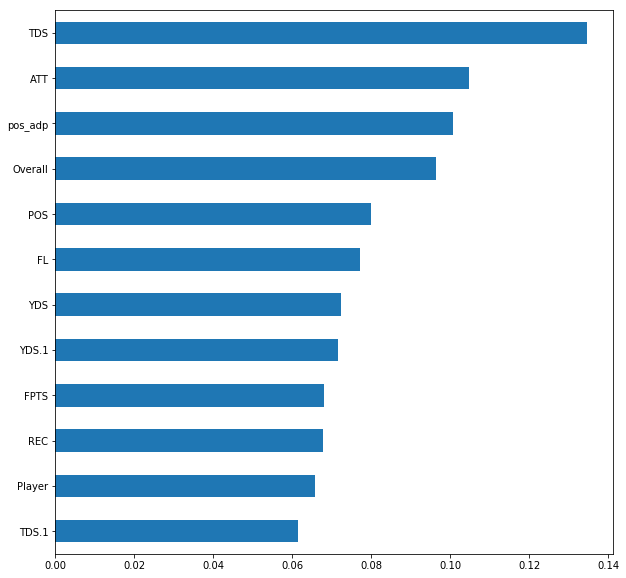

In [212]:
model = pipeline.named_steps['randomforestclassifier']
encoded = pipeline.named_steps['ordinalencoder']
encoded_cols = encoded.transform(X_val).columns
importances = pd.Series(model.feature_importances_, encoded_cols)
plt.figure(figsize=(10,10))
importances.sort_values().plot.barh();